In [147]:
f = open("1_victoria_lake.txt", "r")

In [148]:
#Line 1
l1 = f.readline()
print(l1)

50 50 20 8



In [149]:
N = int(l1.split()[0])
M = int(l1.split()[1])
C = int(l1.split()[2])
R = int(l1.split()[3])

In [150]:
class CustomerOffice:
    def __init__(self,x=0,y=0,cost=0):
        self.x = x
        self.y = y
        self.cost = cost

In [151]:
def read_customer_office(file):
    l = file.readline()
    customerOffice = CustomerOffice()
    customerOffice.x = int(l.split()[0])
    customerOffice.y = int(l.split()[1])
    customerOffice.cost = int(l.split()[2])
    return customerOffice

In [152]:
customerOffices = []
for _ in range(C):
    customerOffices.append(read_customer_office(f))

In [153]:
map_conv = {'#' : 1000, '~':800, '*':200, '+':150, 'X':120, '_':100, 'H':70, 'T':50}

In [154]:
def read_map(f):
    map_ = []
    for x in range(N):
        line = f.readline()
        int_line = [map_conv[i] for i in list(line)[:-1] ] 
        map_.append(int_line)
    return map_
            

In [155]:
map_ = read_map(f)

In [156]:
import numpy as np
import matplotlib.pyplot as plt
map_np = np.array(map_)
map_cs = map_np.copy()
for n in range(C):
    map_cs[customerOffices[n].x][customerOffices[n].y] = 1000

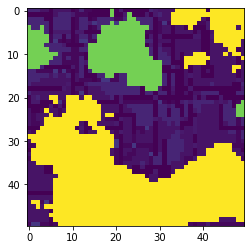

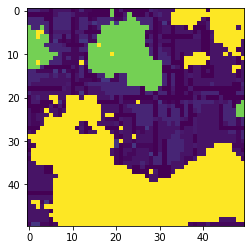

In [157]:
plt.imshow(map_np)
plt.show()
plt.imshow(map_cs)
plt.show()

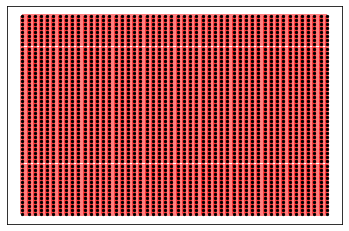

In [158]:
import networkx as nx
G = nx.Graph()
i = 0
G.pos = {}  # location
G.cost = {}  # cost

for x in range(N):
    for y in range(M):
        G.pos[x*N + y] = (float(x), float(y))
        G.cost[x*N + y] = map_np[x][y]

for x in range(N):
    for y in range(M):
    
        i = x * N + y
        up = (x-1) * (N) + y
        down = (x+1) * (N) + y
        left = x * N + y - 1
        right = x * N + y + 1
        if(y != 0):
            G.add_edge(i, left) 
        if(y != N-1):
            G.add_edge(i, right)
        if(x != 0):
            G.add_edge(i, up) 
        if(x != M-1):
            G.add_edge(i, down)

node_size = [int(G.cost[n] / 300.0) for n in G]
nx.draw_networkx_edges(G, G.pos, edge_color='r', width=4, alpha=0.5)
nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")
plt.show()

In [159]:
nx.shortest_path(G, 1, 130, weight='cost')

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 80,
 130]

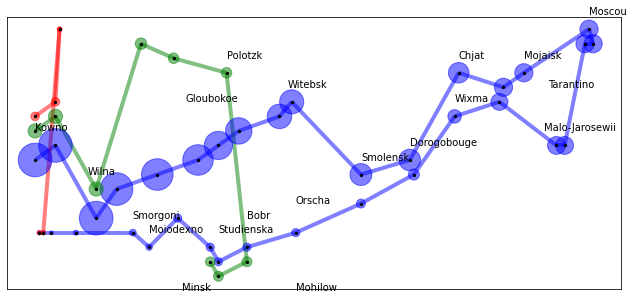

In [112]:
def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split("\n"):
        x, y, name = line.split(",")
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split("\n"):
            x, y, p, r, n = line.split(",")
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


(g, city) = minard_graph()

plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["b", "g", "r"]
for G in g:
    c = colors.pop(0)
    node_size = [int(G.pop[n] / 300.0) for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")
  
for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

True
Configuration model
Degree sequence [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
Degree histogram
degree #nodes
   5      1
   3      4
   2      3
   1      3


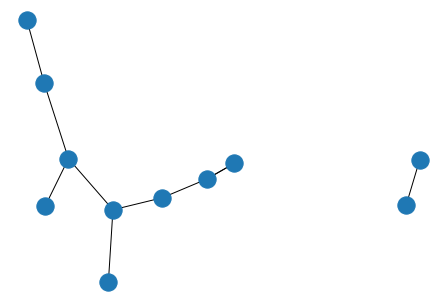

In [97]:
import matplotlib.pyplot as plt
from networkx import nx

z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
print(nx.is_graphical(z))

print("Configuration model")
G = nx.configuration_model(z)  # configuration model
degree_sequence = [d for n, d in G.degree()]  # degree sequence
print(f"Degree sequence {degree_sequence}")
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
print("degree #nodes")
for d in hist:
    print(f"{d:4} {hist[d]:6}")

nx.draw(G)
plt.show()